In [98]:
!ls


BigQuery_LondonCrimes          fastai_gcp.rtf
Cat feeder.ipynb               mictosoftcompetition notes.rtf
Weight.csv                     pi-iot-project.json
connect.ssh                    training-data-analyst


In [1]:
import os
import pandas as pd
from pandas.io import gbq
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "pi-iot-project.json"

# Instantiates a client
bigquery_client = bigquery.Client()

In [11]:
bigquery_client

In [12]:
#!conda install -c conda-forge pandas-gbq -y

In [33]:
query = '''
SELECT * FROM `pi-iot-project-235918.home.sensors` 
where sensor = "Weight"
order by time desc 
'''
# LIMIT 200

In [34]:
df = gbq.read_gbq(query, dialect='standard' );

In [95]:
df.head()

,device,time,sensor,val,extra
0,catfeeder,2019-07-09 15:04:24,Weight,17.0,None
1,catfeeder,2019-07-09 14:59:02,Weight,17.0,None
2,catfeeder,2019-07-09 14:53:46,Weight,17.0,None
3,catfeeder,2019-07-09 14:48:25,Weight,17.0,None
4,catfeeder,2019-07-09 14:42:58,Weight,17.0,None


In [ ]:
# Save the df
df.to_csv('Weight.csv', index=False)

### For Offline access

In [30]:
df=pd.read_csv('Weight.csv')

In [31]:
df.head()

,device,time,sensor,val,extra
0,catfeeder,2019-07-09 15:04:24,Weight,17.0,NaN
1,catfeeder,2019-07-09 14:59:02,Weight,17.0,NaN
2,catfeeder,2019-07-09 14:53:46,Weight,17.0,NaN
3,catfeeder,2019-07-09 14:48:25,Weight,17.0,NaN
4,catfeeder,2019-07-09 14:42:58,Weight,17.0,NaN


In [32]:
Weight=df[df['sensor'] == 'Weight']
Weight=Weight[['time','val']]

# Weight val cleaning

Weight=Weight[Weight.val > 0]
Weight=Weight[Weight.val < 200]
Weight['Day']=Weight['time'].str[:10]
Weight['Hour']=Weight['time'].str[10:]              

In [33]:
day="2019-07-08"

Weight=Weight[Weight.Day == day]
Weight = Weight.sort_values(['time'])

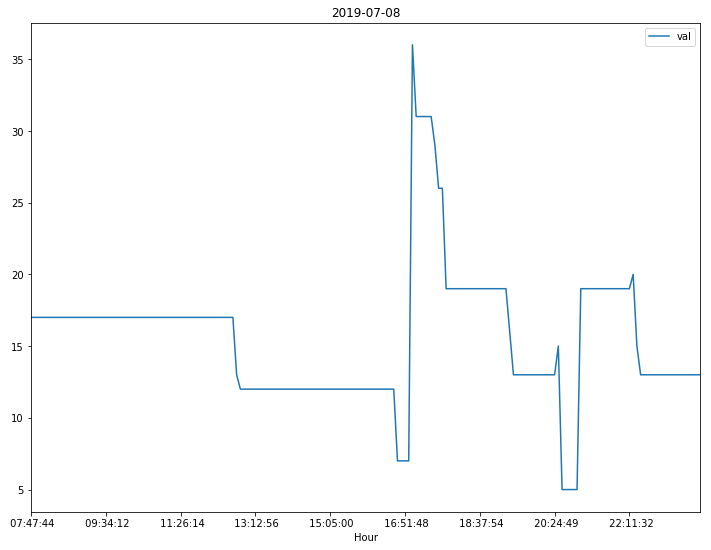

In [34]:
#  The day Weight changes
Weight.plot(title=day, x='Hour', y='val',figsize=(12,9))

In [13]:
Weight.describe()

,val
count,180.000000
mean,15.605556
std,4.779492
min,5.000000
25%,12.000000
50%,17.000000
75%,17.000000
max,36.000000


In [14]:
#real delta function...

Weight['delta']=0
Weight['eaten']=0
Weight['given']=0

for i in range(1, len(Weight)):
    value = Weight['val'].iloc[i] - Weight['val'].iloc[i-1]
    Weight['delta'].iloc[i]=value
    if value < 0:
        Weight['eaten'].iloc[i]= value * (-1)
    if value > 0:
        Weight['given'].iloc[i]= value  
    

/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


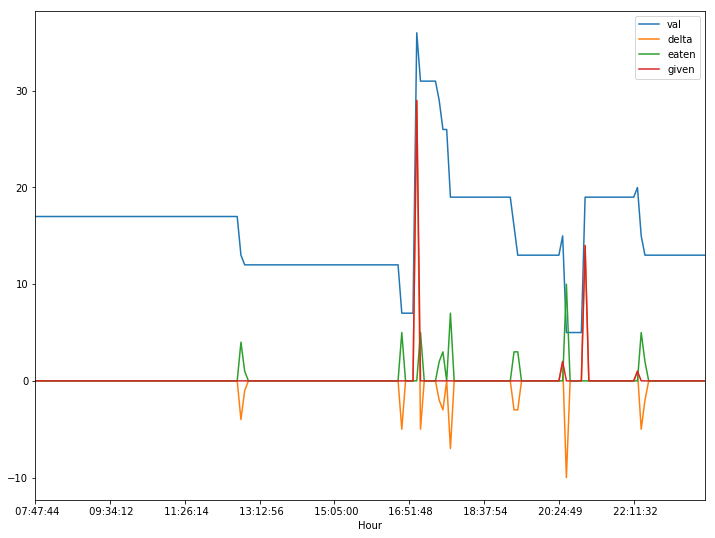

In [15]:
#  The day Weight changes
Weight.plot(x='Hour', y=['val','delta','eaten','given'],figsize=(12,9))

In [16]:
Weight.describe()

,val,delta,eaten,given
count,180.000000,180.000000,180.000000,180.000000
mean,15.605556,-0.022222,0.277778,0.255556
std,4.779492,2.713417,1.210086,2.399074
min,5.000000,-10.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,0.000000,0.000000
max,36.000000,29.000000,10.000000,29.000000


In [24]:
Weight['eaten_cum_Day']=Weight['eaten']
Weight['given_cum_Day']=Weight['given']

for i in range(1, len(Weight)):
    
    value = Weight['eaten_cum_Day'].iloc[i-1] + Weight['eaten_cum_Day'].iloc[i]
    Weight['eaten_cum_Day'].iloc[i]=value
    
    value = Weight['given_cum_Day'].iloc[i-1] + Weight['given_cum_Day'].iloc[i]
    Weight['given_cum_Day'].iloc[i]=value

    

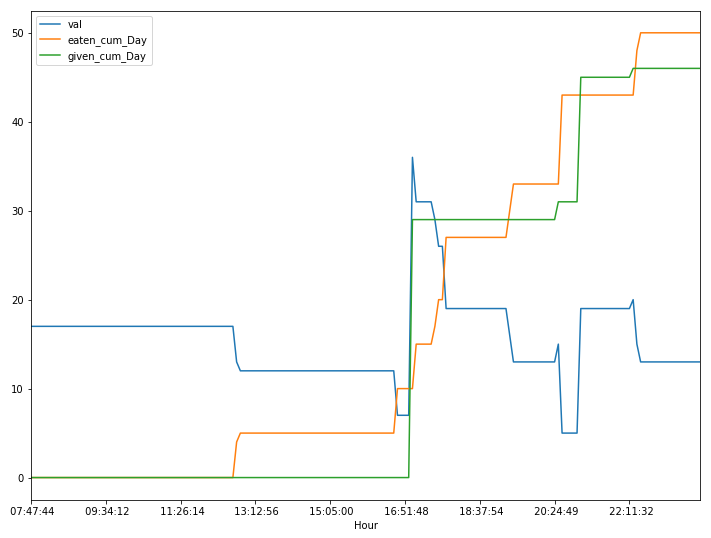

In [25]:
#  The day Weight changes
Weight.plot(x='Hour', y=['val','eaten_cum_Day','given_cum_Day'],figsize=(12,9))

,time,val,Day,Hour,delta,eaten,given,eaten_cum_Day,given_cum_Day
230,2019-07-08 07:47:44,17.0,2019-07-08,07:47:44,0.0,0.0,0.0,0.0,0.0
229,2019-07-08 07:53:06,17.0,2019-07-08,07:53:06,0.0,0.0,0.0,0.0,0.0
228,2019-07-08 07:58:22,17.0,2019-07-08,07:58:22,0.0,0.0,0.0,0.0,0.0
227,2019-07-08 08:03:40,17.0,2019-07-08,08:03:40,0.0,0.0,0.0,0.0,0.0
226,2019-07-08 08:08:56,17.0,2019-07-08,08:08:56,0.0,0.0,0.0,0.0,0.0
225,2019-07-08 08:14:12,17.0,2019-07-08,08:14:12,0.0,0.0,0.0,0.0,0.0
224,2019-07-08 08:19:29,17.0,2019-07-08,08:19:29,0.0,0.0,0.0,0.0,0.0
223,2019-07-08 08:24:54,17.0,2019-07-08,08:24:54,0.0,0.0,0.0,0.0,0.0
222,2019-07-08 08:30:16,17.0,2019-07-08,08:30:16,0.0,0.0,0.0,0.0,0.0
221,2019-07-08 08:35:34,17.0,2019-07-08,08:35:34,0.0,0.0,0.0,0.0,0.0


In [27]:
Weight.to_csv('2019-07-08.csv', index=False)

In [28]:
!ls


2019-07-08.csv                 fastai_gcp.rtf
BigQuery_LondonCrimes          mictosoftcompetition notes.rtf
Cat feeder.ipynb               pi-iot-project.json
Weight.csv                     training-data-analyst
connect.ssh


In [29]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd


data = [go.Scatter( x=Weight['Hour'], y=Weight['val'] )]

plot(data)

'temp-plot.html'